In [1]:
import torch
import torchvision

from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
data = ImageFolder(root='data')

In [2]:
data

Dataset ImageFolder
    Number of datapoints: 18750
    Root Location: data
    Transforms (if any): None
    Target Transforms (if any): None

In [3]:
data.classes

['empty', 'protein']

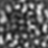

In [12]:
x,y = data[16000]
x